In [5]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from ml_algorithms.neural_network import * 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Load and preprocess the data

In [6]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(data_dir="dataset/")

y = 1. It's a cat picture.


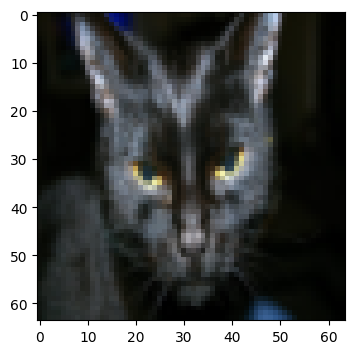

In [7]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [9]:
# Preprocess your dataset 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255
test_x = test_x_flatten/255
print(train_x.shape)
print(test_x.shape)
print(train_y)

(12288, 209)
(12288, 50)
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


## 2) Implement a simple neural network

In [10]:
import inspect
lines = inspect.getsource(MultiLayerPerceptron)
print(lines)

class MultiLayerPerceptron():
    def __init__(self, layer_dims: list = [100, 50, 20, 1], seed=42):
        self.layer_dims = layer_dims
        self.seed = seed
        self.parameters = self.initialize_parameters()
        self.caches = []
        self.grads = {}
        self.train = True

    def initialize_parameters(self) -> dict:
        # Xavier initialization
        np.random.seed(self.seed)
        L = len(self.layer_dims) - 1
        parameters = {}
        for l in range(1, L + 1):
            parameters['W' + str(l)] = np.random.randn(
                self.layer_dims[l], self.layer_dims[l - 1]) / np.sqrt(
                    self.layer_dims[l - 1])
            parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))
        return parameters

    def forward(self, X: np.ndarray) -> np.ndarray:

        L = len(self.layer_dims) - 1
        A_prev = X
        caches = []
        for l in range(1, L):
            A_prev, linear_activation_cache = linear_activation_forward

## 3) Build and train a multi layers neural network

In [11]:
# build your model 
layers_dim = [12288, 20, 7, 5, 1]

In [12]:
def train(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, seed=1, print_cost=False):
    np.random.seed(seed)
    costs = [] 
    model = MultiLayerPerceptron(layer_dims=layers_dims, seed=1)
    
    for i in range(num_iterations):
        
        AL = model.forward(X)
        cost = cross_entropy(AL, Y)
        model.backward(AL, Y)
        model.update_parameters(learning_rate)
        if i%500 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost at iteration{i}: {cost}")
    return model, costs 

In [16]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_iterations = 5000 
costs = {} 
models = {}
for lr in learning_rates:
    print(f'Train @ Learning rate={lr}')
    models[str(lr)], costs[str(lr)] = train(train_x, train_y, layers_dim, learning_rate=lr, num_iterations=num_iterations, print_cost=True)
    print()

Train @ Learning rate=0.1
Cost at iteration0: 0.7717493284237686
Cost at iteration500: 0.6439737380528194
Cost at iteration1000: 0.6439737380528059
Cost at iteration1500: 0.6439737380528057
Cost at iteration2000: 0.6439737380528057
Cost at iteration2500: 0.6439737380528057
Cost at iteration3000: 0.6439737380528057
Cost at iteration3500: 0.6439737380528057
Cost at iteration4000: 0.6439737380528057
Cost at iteration4500: 0.6439737380528057

Train @ Learning rate=0.01
Cost at iteration0: 0.7717493284237686
Cost at iteration500: 0.46126000616108054
Cost at iteration1000: 0.20730930330849956
Cost at iteration1500: 0.07497507157629973
Cost at iteration2000: 0.042258944535071216
Cost at iteration2500: 0.02648436522765356
Cost at iteration3000: 0.018487126889877723
Cost at iteration3500: 0.013605502226137746
Cost at iteration4000: 0.010616104825500216
Cost at iteration4500: 0.008559079840856375

Train @ Learning rate=0.001
Cost at iteration0: 0.7717493284237686
Cost at iteration500: 0.67520698

Text(0.5, 1.0, 'Learning rates')

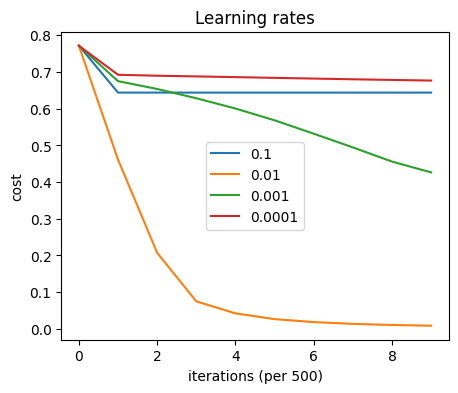

In [17]:
for lr, cost in costs.items():
     plt.plot(cost, label=str(lr))

plt.legend()
plt.xlabel('iterations (per 500)')
plt.ylabel('cost')
plt.title(f'Learning rates')

## 4) Evaluate the model on testset

In [18]:
for lr, model in models.items():
    preds = model.predict(test_x)
    acc = np.sum(preds == test_y) / test_y.shape[1]
    print(f'model accuracy on testset @ Learning rate={lr} : {acc}')
    print()

model accuracy on testset @ Learning rate=0.1 : 0.34

model accuracy on testset @ Learning rate=0.01 : 0.8

model accuracy on testset @ Learning rate=0.001 : 0.8

model accuracy on testset @ Learning rate=0.0001 : 0.36



## References

- https://github.com/amanchadha/coursera-deep-learning-specialization